## Content
[1. Libraries](#1)
 * [1. Introduction ](#1.1)
  * [1.1 Insights & Summary](#1.11)

[2. Feature Engineering](#2)
  * [2.1](#2.1)

[3. Exploratory Data Analysis ](#3)
  * [3.1 Question 1](#3.1)
  * [3.2 Question 2](#3.2)
  * [3.3 Question 3](#3.3)


**ShopSmart Inc.** is an e-commerce platform that sells a variety of products online. The company aims to optimize its website and enhance customer satisfaction by understanding customer behavior and preferences. 

To achieve this goal, ShopSmart Inc. plans to analyze the data collected from its website to gain insights into customer interactions, purchasing patterns, and product preferences.


Project Objective: The objective of this project is to utilize data from ShopSmart Inc.'s website to understand customer behavior and preferences. By analyzing the data, the company aims to:
1.     Segment customers based on their preferences, geographic location, and purchasing behavior.
2.     Enhance website usability and user experience based on insights gained from customer interactions.
3.     Optimize product offerings and marketing strategies to improve customer satisfaction and retention.


## 1. Libraries <a id="1"></a>

In [639]:
# !pip install a-world-of-countries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import missingno
import plotly.graph_objects as go
import plotly.express as px
import awoc
import seaborn as sns
import warnings
from  IPython.display import display,Markdown

In [4]:
warnings.filterwarnings('ignore')
def printmd(value):
    display(Markdown(value))

#### import files

In [7]:
customers = pd.read_csv('customers.csv')
events = pd.read_csv('events.csv')
line_items = pd.read_csv('line_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  10000 non-null  object
 1   device_id    10000 non-null  object
 2   location     10000 non-null  object
 3   currency     10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15 non-null     int64  
 1   name    15 non-null     object 
 2   price   15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [14]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147208 entries, 0 to 147207
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_id         147208 non-null  int64 
 1   customer_id      147208 non-null  object
 2   event_data       147208 non-null  object
 3   event_timestamp  147208 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9165 entries, 0 to 9164
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        9165 non-null   object
 1   customer_id     9165 non-null   object
 2   status          9165 non-null   object
 3   checked_out_at  9165 non-null   object
dtypes: object(4)
memory usage: 286.5+ KB


In [18]:
line_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741 entries, 0 to 31740
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   line_item_id  31741 non-null  int64 
 1   order_id      31741 non-null  object
 2   item_id       31741 non-null  int64 
 3   quantity      31741 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 992.0+ KB


In [9]:
# Merge the customers, events, line_items, orders, and products tables on the customer_id column
merged_data = pd.merge(customers, events, on='customer_id', how='outer') # merged customers and events
merged_data = pd.merge(merged_data, orders, on='customer_id', how='outer') # merged above and customer_id
merged_data = pd.merge(merged_data, line_items, on='order_id', how='outer') # merged above and order_id
merged_data = pd.merge(merged_data, products, left_on='item_id', right_on='id', how='outer') # merged above and item_id

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652958 entries, 0 to 652957
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      652958 non-null  object 
 1   device_id        652958 non-null  object 
 2   location         652958 non-null  object 
 3   currency         652958 non-null  object 
 4   event_id         652958 non-null  int64  
 5   event_data       652958 non-null  object 
 6   event_timestamp  652958 non-null  object 
 7   order_id         645885 non-null  object 
 8   status           645885 non-null  object 
 9   checked_out_at   645885 non-null  object 
 10  line_item_id     578320 non-null  float64
 11  item_id          578320 non-null  float64
 12  quantity         578320 non-null  float64
 13  id               578320 non-null  float64
 14  name             578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(5), int64(1), object(10)
me

In [11]:
def unlock_df(df_name):
    new_data = df_name['event_data'].apply(json.loads)
    event_df = pd.DataFrame(item for item in new_data)
    return event_df

In [218]:
merged_data.rename(columns={'name':'product_name', 'location':'country'},inplace=True) # rename some of the column names

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652958 entries, 0 to 652957
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      652958 non-null  object 
 1   device_id        652958 non-null  object 
 2   country          652958 non-null  object 
 3   currency         652958 non-null  object 
 4   event_id         652958 non-null  int64  
 5   event_data       652958 non-null  object 
 6   event_timestamp  652958 non-null  object 
 7   order_id         645885 non-null  object 
 8   status           645885 non-null  object 
 9   checked_out_at   645885 non-null  object 
 10  line_item_id     578320 non-null  float64
 11  item_id          578320 non-null  float64
 12  quantity         578320 non-null  float64
 13  id               578320 non-null  float64
 14  product_name     578320 non-null  object 
 15  price            578320 non-null  float64
dtypes: float64(5), int64(1), object(10)
me

In [17]:
new_data = pd.concat([merged_data,unlock_df(merged_data).drop(['status','quantity','order_id','item_id'], axis=1)],axis=1).drop(['event_data','item_id','id','line_item_id','event_timestamp'],axis=1)#.drop(columns=['event_id','event_data'],axis=1)
new_data.head()

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-21T12:47:11.012084,visit
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-27T11:35:50.208930,visit
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.392205,visit
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.394393,add_to_cart
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,2024-03-30T04:03:10.394398,add_to_cart


In [232]:
printmd('**Missing Value Percentages**')
(new_data.isna().sum()/new_data.shape[0]*100).sort_values(ascending=False)

**Missing Value Percentages**

product_name                  11.430751
brand                         11.430751
price_range                   11.430751
price                         11.430751
checked_out_at                 1.083224
number_of_days_transaction     1.083224
time_transaction               1.083224
status                         1.083224
order_id                       1.083224
quantity                       0.000000
device_id                      0.000000
timestamp                      0.000000
event_type                     0.000000
day                            0.000000
continent                      0.000000
event_id                       0.000000
currency                       0.000000
country                        0.000000
customer_id                    0.000000
dtype: float64

In [19]:
new_data['quantity'] = new_data['quantity'].fillna(0).astype(int)

In [21]:
new_data.describe()

,event_id,quantity,price
count,652958.000000,652958.000000,578320.000000
mean,88246.576898,2.665812,707.448609
std,42528.242101,1.634111,972.915321
min,14753.000000,0.000000,5.990000
25%,51324.250000,1.000000,149.950000
50%,88382.000000,3.000000,349.990000
75%,125016.000000,4.000000,899.990000
max,161960.000000,5.000000,3999.990000


In [23]:
new_data.describe(exclude='number').T

,count,unique,top,freq
customer_id,652958,10000,eb7dcb88-073d-403e-bdd4-1e5725fe2338,372
device_id,652958,10000,5d53495a-55ac-49bf-b876-ad1ac4b8d2a4,372
country,652958,243,Korea,7496
currency,652958,3,USD,223367
order_id,645885,9165,5cc9c814-c69a-4831-9b50-92abe2c1dea2,372
status,645885,3,failed,219558
checked_out_at,645885,9165,2024-03-30 04:09:12.797464,372
product_name,578320,15,Canon EOS R5 Camera,39715
timestamp,652958,142501,2024-03-30T04:03:10.735158,24
event_type,652958,4,add_to_cart,302724


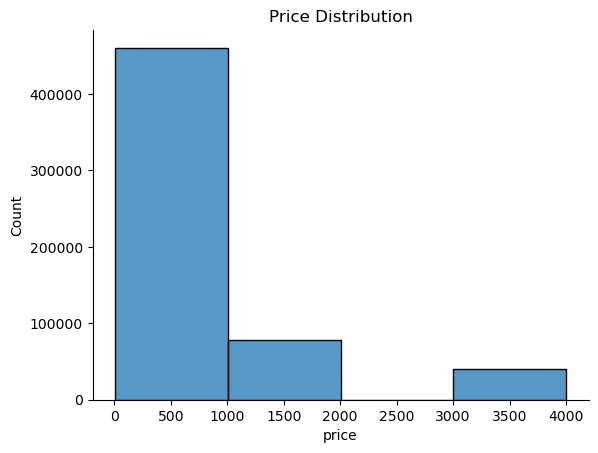

In [25]:
ax = sns.histplot(new_data['price'],bins=4)
ax.set_title('Price Distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [27]:
printmd(f'The number of duplicate rows = {len(new_data[new_data.duplicated()])}')

The number of duplicate rows = 0

<Axes: >

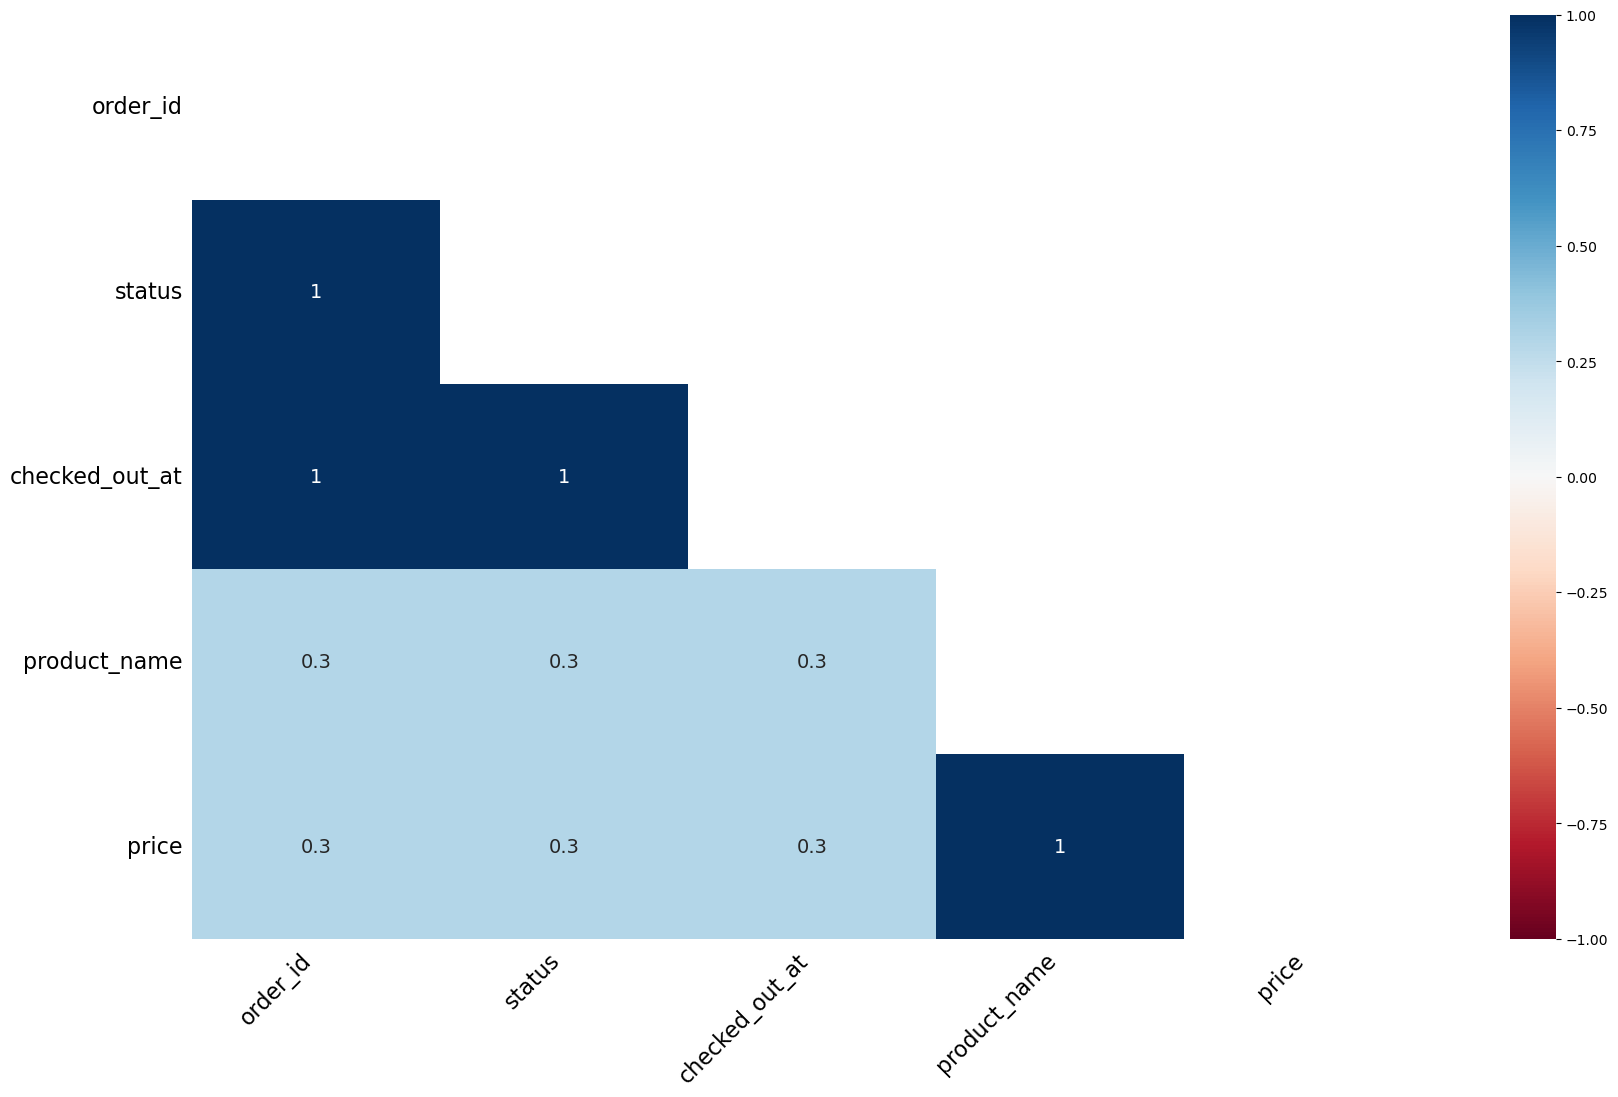

In [29]:
missingno.heatmap(new_data)

In [31]:
new_data['currency'] = new_data['currency'].astype('category')

### Date Time Transformation

In [34]:
new_data['timestamp'] = pd.to_datetime(new_data['timestamp'],format='%Y-%m-%dT%H:%M:%S.%f')
new_data['checked_out_at'] = pd.to_datetime(new_data['checked_out_at'], format='%Y-%m-%d %H:%M:%S.%f')

In [36]:
printmd(f'Dataset start date = {new_data["timestamp"].dt.date.min()}')
printmd(f'Dataset end date = {new_data["timestamp"].dt.date.max()}')
printmd(f'Dataset Spanning Through {new_data["timestamp"].dt.date.max() - new_data["timestamp"].dt.date.min()}')

Dataset start date = 2024-03-19

Dataset end date = 2024-03-30

Dataset Spanning Through 11 days, 0:00:00

In [38]:
new_data['day'] = new_data['timestamp'].dt.day_name()

### Feature Engineering <a id=2></a>

In [41]:
country = new_data['country']
country = country.apply(lambda x: x.split('(')[0].strip())
# Replace country names
country.replace({'United States of America': 'United States',
                     'Congo': 'Democratic Republic of the Congo',
                     "Lao People's Democratic Republic":'Laos',
                     "Brunei Darussalam":'Brunei',
                     "Kyrgyz Republic":'Kyrgyzstan',
                     "Macao":'Macau',
                     "Palestinian Territory":"Palestine",
                     "Syrian Arab Republic":'Syria',
                     "Cote d'Ivoire":'Ivory Coast',
                     'Russian Federation':'Russia',
                     "North Macedonia":'Macedonia', 
                     'South Korea':'Korea',
                     'North Korea':'Korea',
                     'Cocos':'Cocos Islands',
                     "Libyan Arab Jamahiriya":'Libya'}, inplace=True)


In [43]:
all_countries = awoc.AWOC().get_countries() # get dictionary of all countries

def get_continent(location):
    for obj in all_countries:
        if obj['Country Name'] == location:
            return obj['Continent Name']
    else:
        if location == 'Korea':
            return 'Asia'
        elif location == 'United States of America':
            return 'North America'
        return 'Other Islands'

In [45]:
new_data['continent'] = country.apply(get_continent)
new_data['country'].replace({'Democratic Republic of the Congo':'Congo'},inplace=True)

In [46]:
new_data['price_range'] = pd.qcut(new_data.price,3, labels=['low','mid','high']) # separating prices into three price range 

In [47]:
new_data['product_name'].replace({'iPhone 13':'Apple iPhone 13'}, inplace=True)

In [51]:
new_data['brand'] = new_data['product_name'].apply(lambda x : x.split(' ')[0] if not pd.isna(x) else x)

In [459]:
new_data['number_of_days_transaction'] = np.ceil(new_data.groupby('customer_id')['timestamp'].\
                                                  transform(lambda x:np.ptp(x)).dt.total_seconds()/86400) #86400 is the total number of seconds in a day

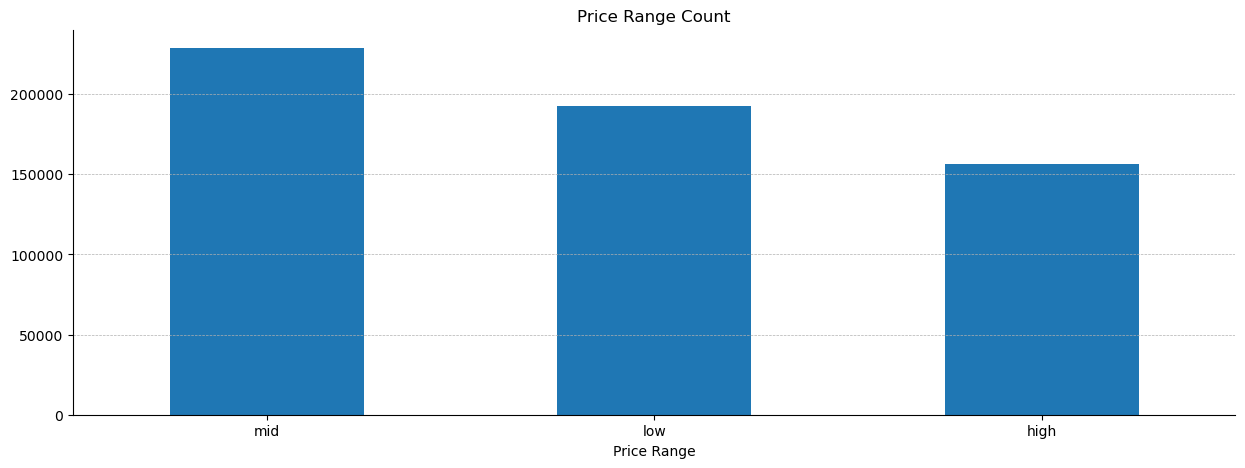

In [55]:
ax = new_data['price_range'].value_counts().plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel('Price Range')
plt.title('Price Range Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

## 3. EDA <a id="3"></a>

In [561]:
# correlation between price and quantity of product bought
sns.scatterplot(data=checkedout, x='quantity',y='price')
printmd('There is no difference in the price and the quantity of products bought')

NameError: name 'checkedout' is not defined

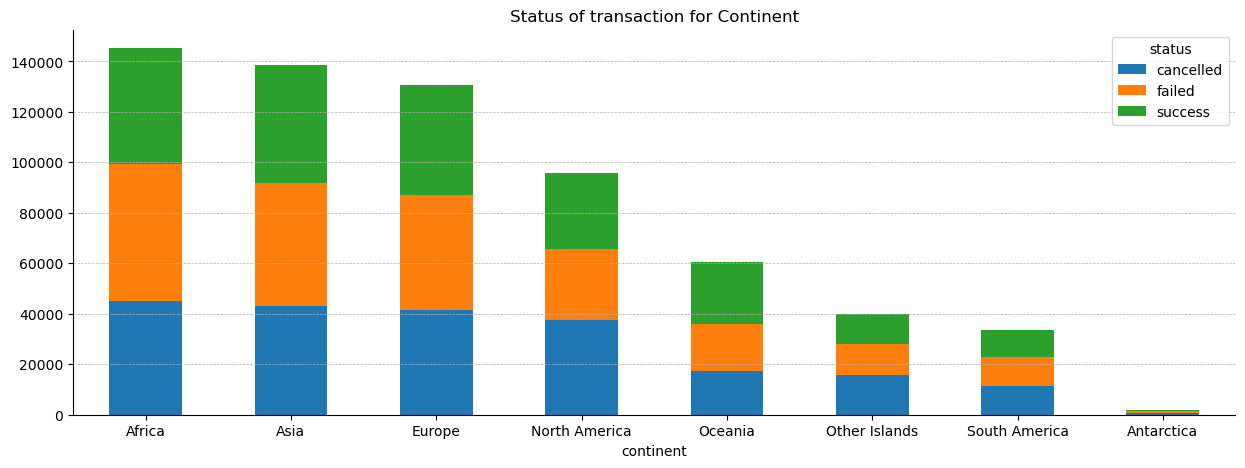

In [59]:
ax = new_data.groupby('continent')['status'].value_counts().unstack().sort_values(by=['failed','cancelled','success'], ascending=False).plot(kind='bar', stacked=True, figsize=(15,5))
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title('Status of transaction for Continent')
plt.show()

From the figure above, <b>Africa</b> has the <b>highest number of transaction</b> which may be due to the fact that Africa has the highest number of countries, followed by <b>Asia</b> and <b>Antarctica</b> is the <b>lowest</b>

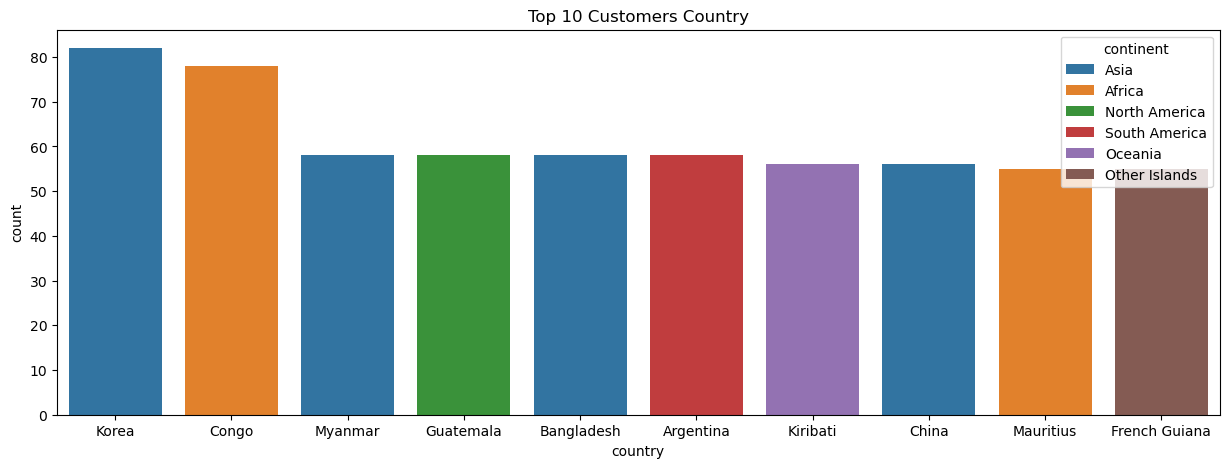

In [33]:
customersBYcountry = new_data.groupby(['country','continent'])['customer_id'].nunique().reset_index(name='count').sort_values(by = ['count','country'],ascending=False)
# customersBYcontinent
plt.figure(figsize=(15,5))
ax = sns.barplot(data=customersBYcountry[:10], x='country',y='count', hue='continent')
ax.set_title("Top 10 Customers Country")
ax.set_xticklabels(ax.get_xticklabels())
plt.show()


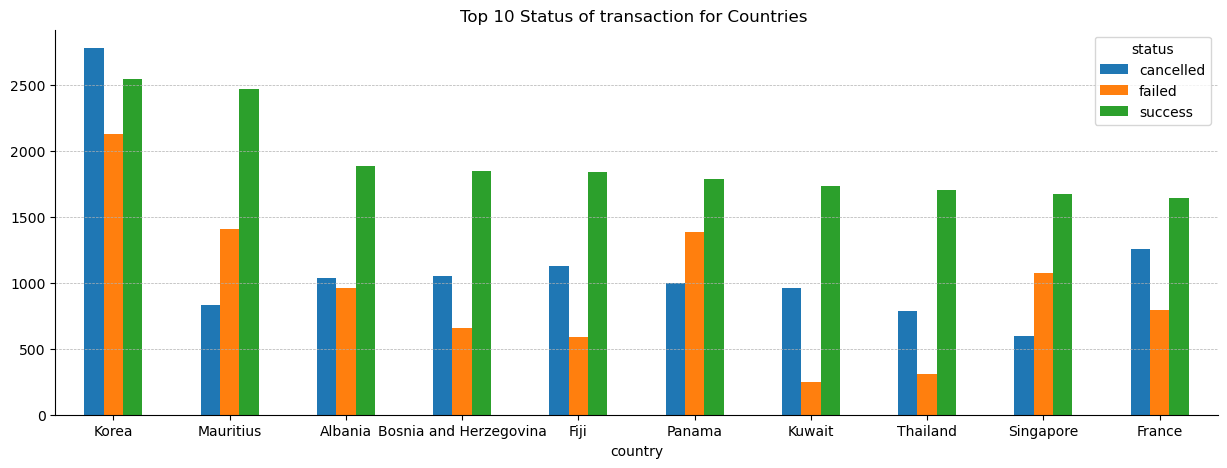

In [34]:
ax = new_data.groupby('country')['status'].value_counts().unstack().sort_values(by=['success','cancelled','failed'], ascending=False)[:10]\
.plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.title('Top 10 Status of transaction for Countries ')
plt.show()

<b>Korea</b> is the country where most of the tranactions but they still have the most **cancelled** number of order

**Mauritius** is second most successful order but has the low cancelled number of order when compared with **Korea**

In [35]:
def check_cus(id,col='customer_id'):
    return new_data[new_data[col] == id]
# check_cus(id='4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf')

### 3.1 Visit Frequency <a id="3.1"></a>
- How often does this customer visit the website, based on the provided data?
- Can you identify any patterns or trends in the customer's visit frequency?


In [469]:
#get the event type which are equal to visit
event_visit_type = new_data[new_data['event_type'] == 'visit']
event_visit_type.head()

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,time_transaction
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-21 12:47:11.012084,visit,Thursday,Asia,NaN,NaN,9.0,9.0
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-27 11:35:50.208930,visit,Wednesday,Asia,NaN,NaN,9.0,9.0
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-30 04:03:10.392205,visit,Saturday,Asia,NaN,NaN,9.0,9.0
9,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14762,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,0,NaN,NaN,2024-03-19 06:08:39.175184,visit,Tuesday,North America,NaN,NaN,11.0,11.0
10,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14763,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,0,NaN,NaN,2024-03-26 05:51:26.514840,visit,Tuesday,North America,NaN,NaN,11.0,11.0


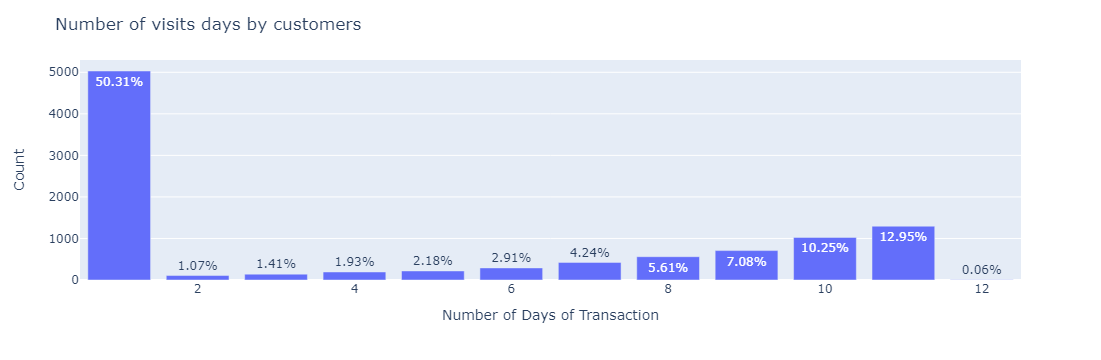

In [601]:
visit_day_number = event_visit_type.groupby('number_of_days_transaction')['customer_id'].nunique()

percentages = get_percentages(visit_day_number)
fig = px.bar(x=visit_day_number.index,y=visit_day_number.values,text=percentages.apply(lambda x :str(x) + '%'))

fig.update_layout(title='Number of visits days by customers',xaxis_title='Number of Days of Transaction',yaxis_title='Count')
fig.show()

In [499]:
printmd(f"**{percentages.iloc[0]}%** of the customers visit the website for **just one day** while it can be seen that there is an increase in some customers visit after **day 2** till **day 11** after which there is almost absolute drop to zero. \nThe means that customers **if they dont finish their transaction on same day may take up to 11 days to** to make decision on the products they want to purchase")

**50.31%** of the customers visit the website for **just one day** while it can be seen that there is an increase in some customers visit after **day 2** till **day 11** after which there is almost absolute drop to zero. 
The means that customers **if they dont finish their transaction on same day may take up to 11 days to** to make decision on the products they want to purchase

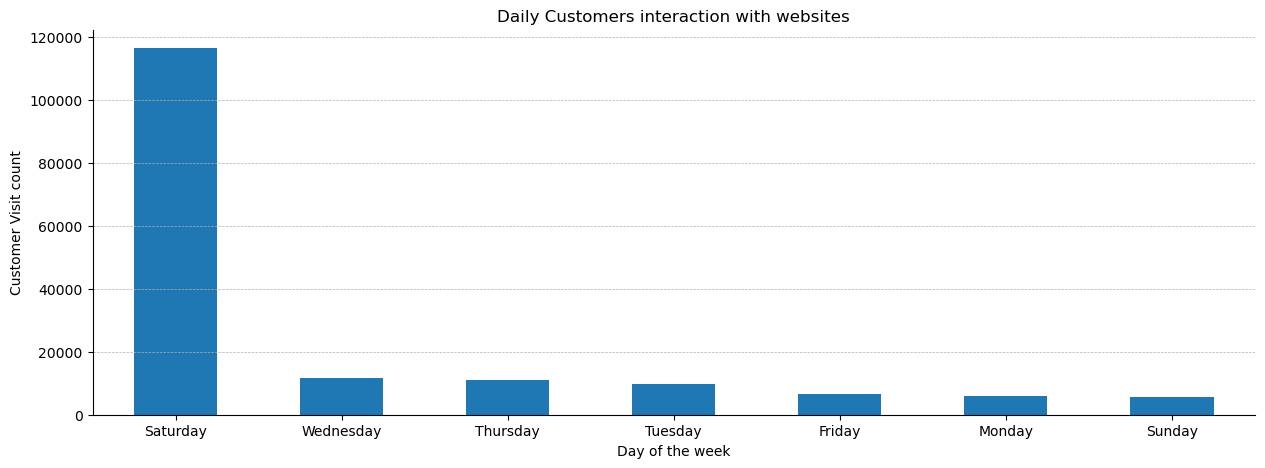

The website is <b>VISITED</b> mostly on <b>SATURDAY</b> while <b>SUNDAY</b> has the <b>LEAST VISIT</b>

In [505]:
ax = event_visit_type['timestamp'].dt.day_name().value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Daily Customers interaction with websites')
plt.xticks(rotation=0)
plt.xlabel('Day of the week')
plt.ylabel('Customer Visit count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
printmd('The website is <b>VISITED</b> mostly on <b>SATURDAY</b> while <b>SUNDAY</b> has the <b>LEAST VISIT</b>')

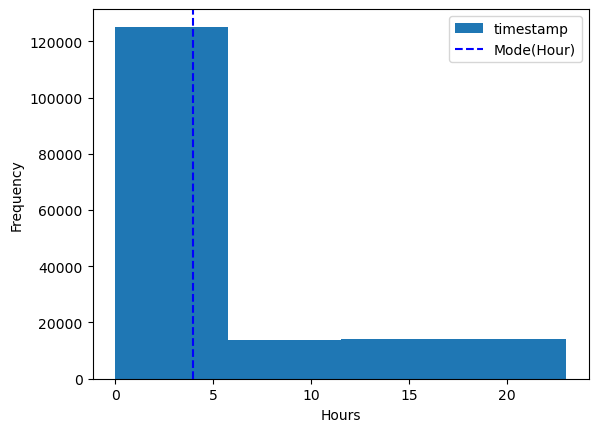

Users visit the websites mostly during the <b>FIRST QUARTER</b> of the day which is between <b>12 AM</b> to <b>6 AM</b> and the **highest visit** being <b>4 AM</b>

In [507]:
ax = event_visit_type['timestamp'].dt.hour.plot(kind='hist',bins=4)
mode_hour = new_data['timestamp'].dt.hour.mode()[0]
plt.axvline(mode_hour, color='b', linestyle='--', label='Mode(Hour)')
plt.legend()
ax.set_xlabel('Hours')
plt.show()

printmd('Users visit the websites mostly during the <b>FIRST QUARTER</b> of the day which is between <b>12 AM</b> to <b>6 AM</b> and the **highest visit** being <b>4 AM</b>')

In [41]:
product_visit = pd.pivot(data=event_visit_type, values='product_name', columns='country').mode().stack()[0]
printmd('Each <b>COUNTRY</b> and the product customers <b>VISITED THE MOST</b>:\n')
product_visit.reset_index(name='most visited product')

Each <b>COUNTRY</b> and the product customers <b>VISITED THE MOST</b>:


,country,most visited product
0,Afghanistan,Canon EOS R5 Camera
1,Albania,Samsung Galaxy S21
2,Algeria,Sony PlayStation 5
3,American Samoa,Microsoft Xbox Series X
4,Andorra,Canon EOS R5 Camera
...,...,...
238,Wallis and Futuna,Apple iPhone 13
239,Western Sahara,Sony WH-1000XM4 Headphones
240,Yemen,Microsoft Xbox Series X
241,Zambia,Canon EOS R5 Camera


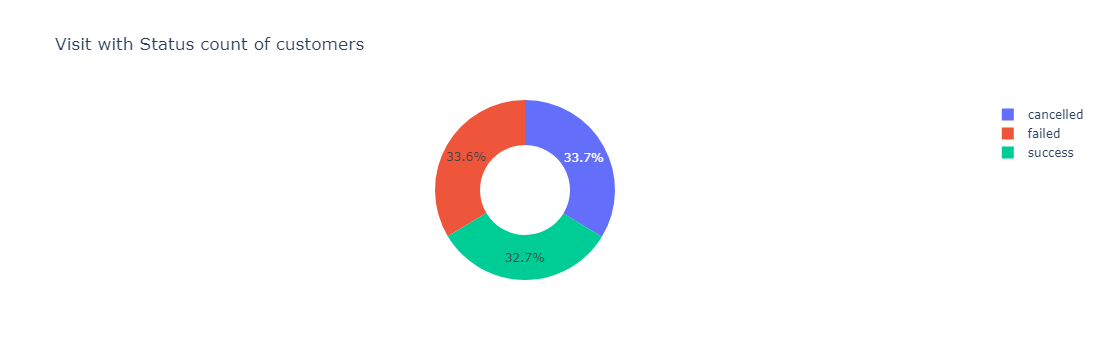

In [559]:
visit_status = event_visit_type.groupby('status')['customer_id'].nunique()
fig = go.Figure(data=go.Pie(labels=visit_status.index, values=visit_status, hole=0.5))
fig.update_layout(title = 'Visit with Status count of customers')
fig.show()

In [569]:
event_visit_type

,customer_id,device_id,country,currency,event_id,order_id,status,checked_out_at,quantity,product_name,price,timestamp,event_type,day,continent,price_range,brand,number_of_days_transaction,time_transaction
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-21 12:47:11.012084,visit,Thursday,Asia,NaN,NaN,9.0,9.0
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-27 11:35:50.208930,visit,Wednesday,Asia,NaN,NaN,9.0,9.0
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,0,NaN,NaN,2024-03-30 04:03:10.392205,visit,Saturday,Asia,NaN,NaN,9.0,9.0
9,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14762,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,0,NaN,NaN,2024-03-19 06:08:39.175184,visit,Tuesday,North America,NaN,NaN,11.0,11.0
10,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP,14763,62a67177-1d7f-44fe-86f8-622686d68f69,cancelled,2024-03-30 04:15:10.403885,0,NaN,NaN,2024-03-26 05:51:26.514840,visit,Tuesday,North America,NaN,NaN,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652946,3aa213f4-2699-43b4-96b8-bf0de1cda133,35a035eb-5b04-45ff-8be7-66b8bbcc20a4,Liechtenstein,GBP,161939,4c2defc5-b1fe-4f2f-90b1-6ccce7bf481d,cancelled,2024-03-30 04:19:18.223427,2,Sony PlayStation 5,499.99,2024-03-30 04:03:18.223369,visit,Saturday,Europe,mid,Sony,11.0,9.0
652947,3aa213f4-2699-43b4-96b8-bf0de1cda133,35a035eb-5b04-45ff-8be7-66b8bbcc20a4,Liechtenstein,GBP,161940,4c2defc5-b1fe-4f2f-90b1-6ccce7bf481d,cancelled,2024-03-30 04:19:18.223427,2,Sony PlayStation 5,499.99,2024-03-30 04:03:18.223371,visit,Saturday,Europe,mid,Sony,11.0,9.0
652948,3aa213f4-2699-43b4-96b8-bf0de1cda133,35a035eb-5b04-45ff-8be7-66b8bbcc20a4,Liechtenstein,GBP,161941,4c2defc5-b1fe-4f2f-90b1-6ccce7bf481d,cancelled,2024-03-30 04:19:18.223427,2,Sony PlayStation 5,499.99,2024-03-30 04:03:18.223372,visit,Saturday,Europe,mid,Sony,11.0,9.0
652949,3aa213f4-2699-43b4-96b8-bf0de1cda133,35a035eb-5b04-45ff-8be7-66b8bbcc20a4,Liechtenstein,GBP,161942,4c2defc5-b1fe-4f2f-90b1-6ccce7bf481d,cancelled,2024-03-30 04:19:18.223427,2,Sony PlayStation 5,499.99,2024-03-30 04:03:18.223372,visit,Saturday,Europe,mid,Sony,11.0,9.0


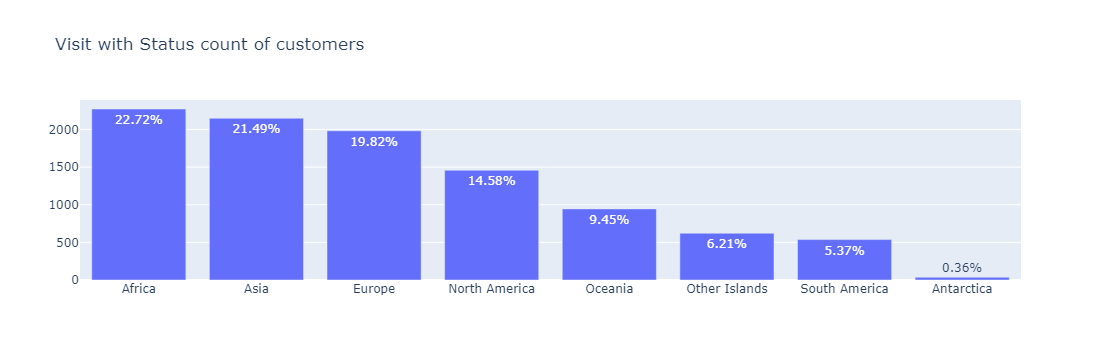

In [621]:
visit_country = event_visit_type.groupby('continent')['customer_id'].nunique().sort_values(ascending=False)
percentages = get_percentages(visit_country)
fig = go.Figure(data=go.Bar(x=visit_country.index, y=visit_country.values, text=percentages.apply(lambda y :str(y) + '%')))
fig.update_layout(title = 'Visit with Status count of customers')
fig.show()

In [645]:
printmd(f'Most of the visits to the website are customers from **{percentages.index[0]} ({percentages.values[0]}%)**, **{percentages.index[1]} ({percentages.values[1]}%)** and **{percentages.index[2]} ({percentages.values[2]}%)** making the **top 3** of the continents that visits the website')

Most of the visits to the website are customers from **Africa (22.72%)**, **Asia (21.49%)** and **Europe (19.82%)** making the **top 3** of the continents that visits the website

In [ ]:
# Percentage Completion Rate
checkedout = new_data[(new_data['event_type'] == 'checkout')]

status_counts = checkedout['status'].value_counts(dropna=False)

fig = go.Figure(data=go.Pie(labels=status_counts.index, values=status_counts, hole=0.5))


fig.update_layout(title='Customer\'s Transaction Checkout Status Rate')

fig.show()


In [44]:
# Percentage Completion Rate
checkedout = new_data[(new_data['event_type'] == 'checkout')]

status_counts = checkedout['status'].value_counts(dropna=False)

fig = go.Figure(data=go.Pie(labels=status_counts.index, values=status_counts, hole=0.5))


fig.update_layout(title='Customer\'s Transaction Checkout Status Rate')

fig.show()


<Axes: xlabel='country'>

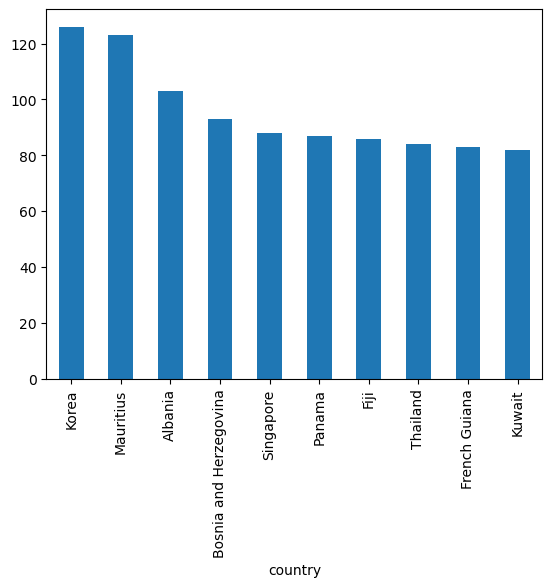

In [45]:
# checkedout and success
checkedout[checkedout['status'] == 'success'].groupby('country')['brand'].size().sort_values(ascending=False)[:10].plot(kind='bar')

There is no difference in the price and the quantity of products bought

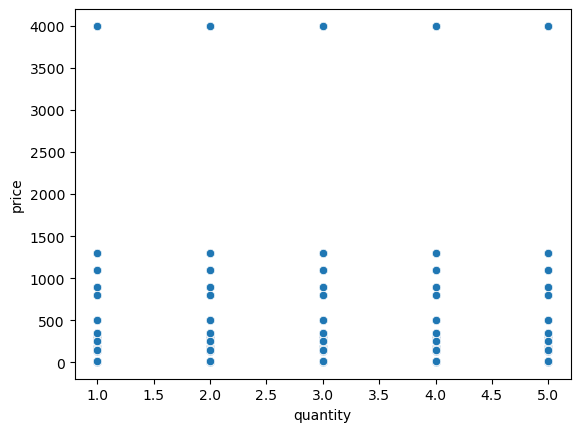

In [47]:
printmd(f'The time for **most checkout** is within **{checkedout["checked_out_at"].dt.hour.value_counts().index[0]} AM**')
# printmd()

The time for **most checkout** is within **4 AM**

In [48]:
continent_status_rate = pd.pivot_table(data=event_visit_type, columns='continent', values='quantity',index = 'status',aggfunc='sum')
continent_status_rate

continent,Africa,Antarctica,Asia,Europe,North America,Oceania,Other Islands,South America
status,,,,,,,,
cancelled,30579,401,28009,27626,25058,12429,10468,7783
failed,36615,205,32767,30152,19060,12304,7944,6648
success,32107,391,31110,28403,19919,16838,7893,6365


In [49]:
# Calculate percentages
total_counts = continent_status_rate.sum(axis=1)
percentages = (continent_status_rate.div(total_counts, axis=0) * 100).round(2)

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=percentages.values,
    x=percentages.columns,
    y=percentages.index,
    colorscale='oryel',
    colorbar=dict(title='Percentage')
))

# Add annotations
for i in range(len(percentages.index)):
    for j in range(len(percentages.columns)):
        fig.add_annotation(
            x=percentages.columns[j],
            y=percentages.index[i],
            text=str(percentages.values[i, j]) + '%',
            showarrow=False,
            font=dict(color='white')
        )

# Update layout
fig.update_layout(
    title='Status by Continent Heatmap',
    xaxis_title='Continent',
    yaxis_title='Status'
)

# Show figure
fig.show()


In [52]:
grouped = event_visit_type.groupby('continent')

# Define a function to get the first product with the highest quantity for each continent
def first_highest_quantity(group):
    return group['product_name'].mode().iloc[0]
# grouped.apply(first_highest_quantity).reset_index()

Customers may wish to purchase products that are the most visited in their country or continents

In [53]:
printmd('Each <b>CONTINENT</b> and the product customers <b>VISITED THE MOST</b>:\n')
display(product_visit.reset_index(name='most visited product'))
print('')
printmd('Three brands seems to be the most visited in the continents, more of these brands should be made available to the continents and countries')

Each <b>CONTINENT</b> and the product customers <b>VISITED THE MOST</b>:


,continent,most visited product
0,Africa,Apple
1,Antarctica,Samsung
2,Asia,Apple
3,Europe,Sony
4,North America,Samsung
5,Oceania,Samsung
6,Other Islands,Samsung
7,South America,Apple


Three brands seems to be the most visited in the continents, more of these brands should be made available to the continents and countries

In [54]:
product_visit = pd.pivot(data=event_visit_type, values='brand', columns='continent').mode().stack()[0]
product_checkout = pd.pivot(data=checkedout, values='brand', columns='continent').mode().stack()[0]
product_result = pd.concat([product_visit,product_checkout],axis=1, ignore_index=True,names=['visit','checkout'])

printmd('Each **CONTINENT** and the product customers **VISITED THE MOST**:\n')
display(product_result.reset_index().rename(columns={'level_0': 'continent', 0: 'most visited product',1:'most checked out'}))
print('')
printmd('Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.')

Each **CONTINENT** and the product customers **VISITED THE MOST**:


,continent,most visited product,most checked out
0,Africa,Apple,Apple
1,Antarctica,Samsung,Samsung
2,Asia,Apple,Apple
3,Europe,Sony,Samsung
4,North America,Samsung,Sony
5,Oceania,Samsung,Apple
6,Other Islands,Samsung,Samsung
7,South America,Apple,Sony


Three brands seem to be the most visited in the continents. More of these brands should be made available to the continents and countries.

In [55]:
res = new_data[new_data['status'] == 'success'].groupby(['order_id'])['event_type'].value_counts().sort_values().unstack()

In [56]:
new_data.groupby(['order_id'],dropna=False)['status'].value_counts()

order_id                              status   
00048099-2eb1-4324-8bea-de44b8314c1d  success       19
0013dca7-52fe-4794-ad3b-7b30958b368f  failed        91
0014e137-7c9b-4bce-bb21-63c30d65b60c  cancelled     15
0024cb96-2aa0-4f43-80c3-7d1008f3d320  cancelled     72
00276b43-c45d-4e73-9f42-90dd5aaacbd1  cancelled     44
                                                  ... 
ffd60b79-a748-4c52-903d-37f86008e224  failed       168
ffdf274a-a059-419c-8fc7-ff3fc020ec8d  cancelled     10
fff0c35d-f65d-40d2-a69a-e00168d134cb  success       48
fff8e99a-de65-4b4c-8aaa-291961ed50c4  cancelled    102
fffcfc29-d713-4ca2-aa7b-36466cbda9d3  success      170
Name: count, Length: 9165, dtype: int64

In [57]:
# Visited and Successfully checked out
new_data[new_data['status'] == 'success']['order_id'].value_counts(dropna=False)

order_id
9af259a9-1642-4f2c-bc78-1161bc747e98    360
5984596b-0ed5-4571-8e79-b261e6f138ad    360
ef16ec0a-af8d-42a5-9c7d-a4241bfc089d    348
dce7a292-597d-4962-9f4f-e762c37a490c    348
ad7acdf7-fea6-4f67-8003-036c03041453    348
                                       ... 
87a374d6-3188-431e-bcbb-1f8e570f47cf      2
77b82f24-3460-47ba-9afa-6520235a7c4e      2
0bc375dc-732d-4d9c-9ce9-40be7d43dc25      2
a6530fd9-9108-4871-9db5-a28d1478ce10      2
ab912a19-4368-491a-833d-87adae2daef6      2
Name: count, Length: 2998, dtype: int64

<a id="3.2"></a>
### 3.2 Location Analysis:
- What is the customer's location based on the provided data?
- How might the customer's location influence their purchasing behavior?


#### customers location

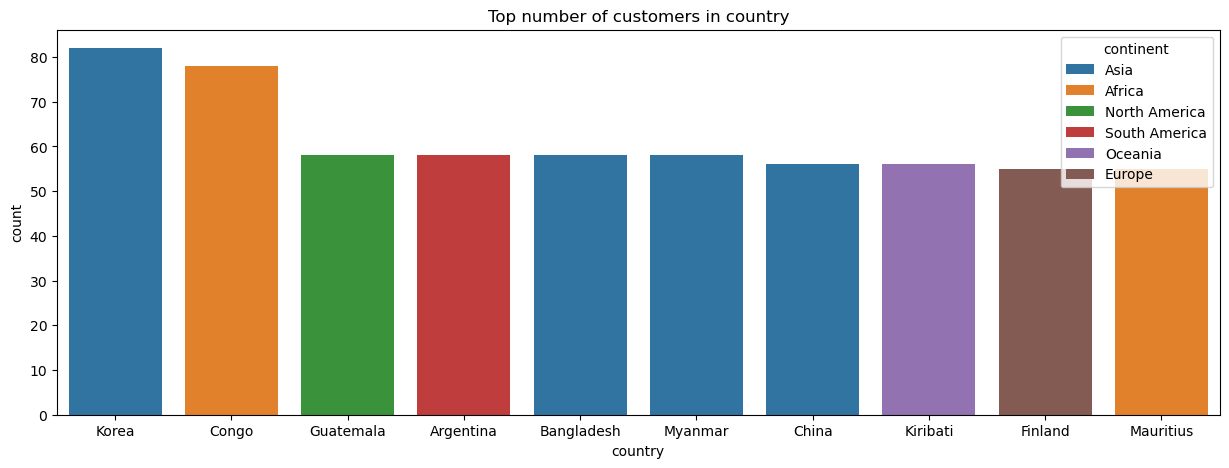

,country,continent,count,percentages
0,Korea,Asia,82,0.82
1,Congo,Africa,78,0.78
2,Guatemala,North America,58,0.58
3,Argentina,South America,58,0.58
4,Bangladesh,Asia,58,0.58
...,...,...,...,...
238,French Polynesia,Oceania,27,0.27
239,Montenegro,Europe,27,0.27
240,Italy,Europe,27,0.27
241,Chad,Africa,25,0.25


In [58]:
result = new_data.groupby(['country','continent'])['customer_id'].nunique().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(15,5))
sns.barplot(result[:10], x='country', y = 'count', hue='continent')
plt.title('Top number of customers in country')
plt.show()
result['percentages'] = result['count'].div(result['count'].sum())*100

display(result)

Out of the 10000 customers, **0.82%** of them are **Koreans**, followed by **Congo** with **0.78%** of the customers

In [597]:
def get_percentages(d_series):
    return round(d_series/d_series.sum()*100,2)


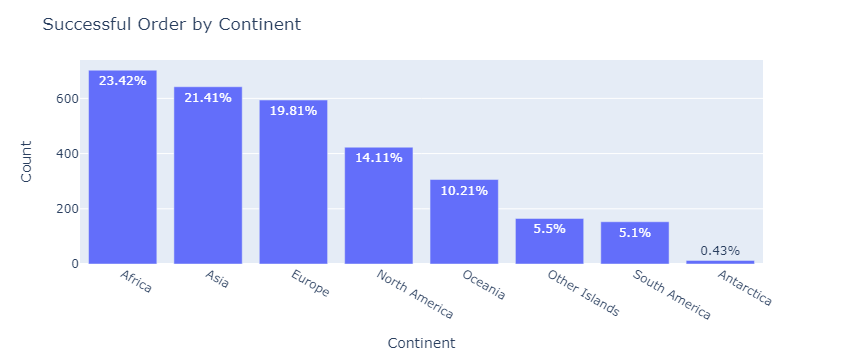

<Figure size 1500x500 with 0 Axes>

In [599]:
# order by continent
plt.figure(figsize=(15,5))
result = new_data[new_data['status'] == 'success'].groupby('continent')['order_id'].nunique().sort_values(ascending=False)[:10]
percentages = get_percentages(result)
fig = px.bar(x=result.index,y=result.values,text=percentages.apply(lambda x :str(x) + '%'))

fig.update_layout(title='Successful Order by Continent',xaxis_title='Continent',yaxis_title='Count')
fig.show()

<b>AFRICAN CUSTOMERS (23.42%)</b> visits the website the most and there are <b>high number of CHECKOUT</b> for customers in <b>AFRICA</b>, <b>EUROPE (21.41%)</b>, and <b>ASIA (19.81%)</b>
 

#### Places where order comes from

In [60]:
new_data.groupby(['country'])['order_id'].nunique().sort_values(ascending=False)

country
Korea         79
Congo         70
Argentina     55
Guatemala     53
Mauritius     52
              ..
Slovenia      25
Montenegro    24
Italy         23
Uganda        22
Chad          22
Name: order_id, Length: 243, dtype: int64

In [63]:
new_data.groupby(['continent'])['order_id'].nunique().sort_values(ascending=False)

continent
Africa           2073
Asia             1968
Europe           1815
North America    1346
Oceania           870
Other Islands     565
South America     493
Antarctica         35
Name: order_id, dtype: int64

In [64]:
pd.pivot_table(data=new_data,columns='status',index='continent',aggfunc='count',values='product_name')

status,cancelled,failed,success
continent,,,
Africa,39926,48989,41176
Antarctica,665,547,462
Asia,38236,43670,42086
Europe,36811,41241,39220
North America,34092,25139,26750
Oceania,15126,16258,22474
Other Islands,14311,10657,10886
South America,10176,9882,9540


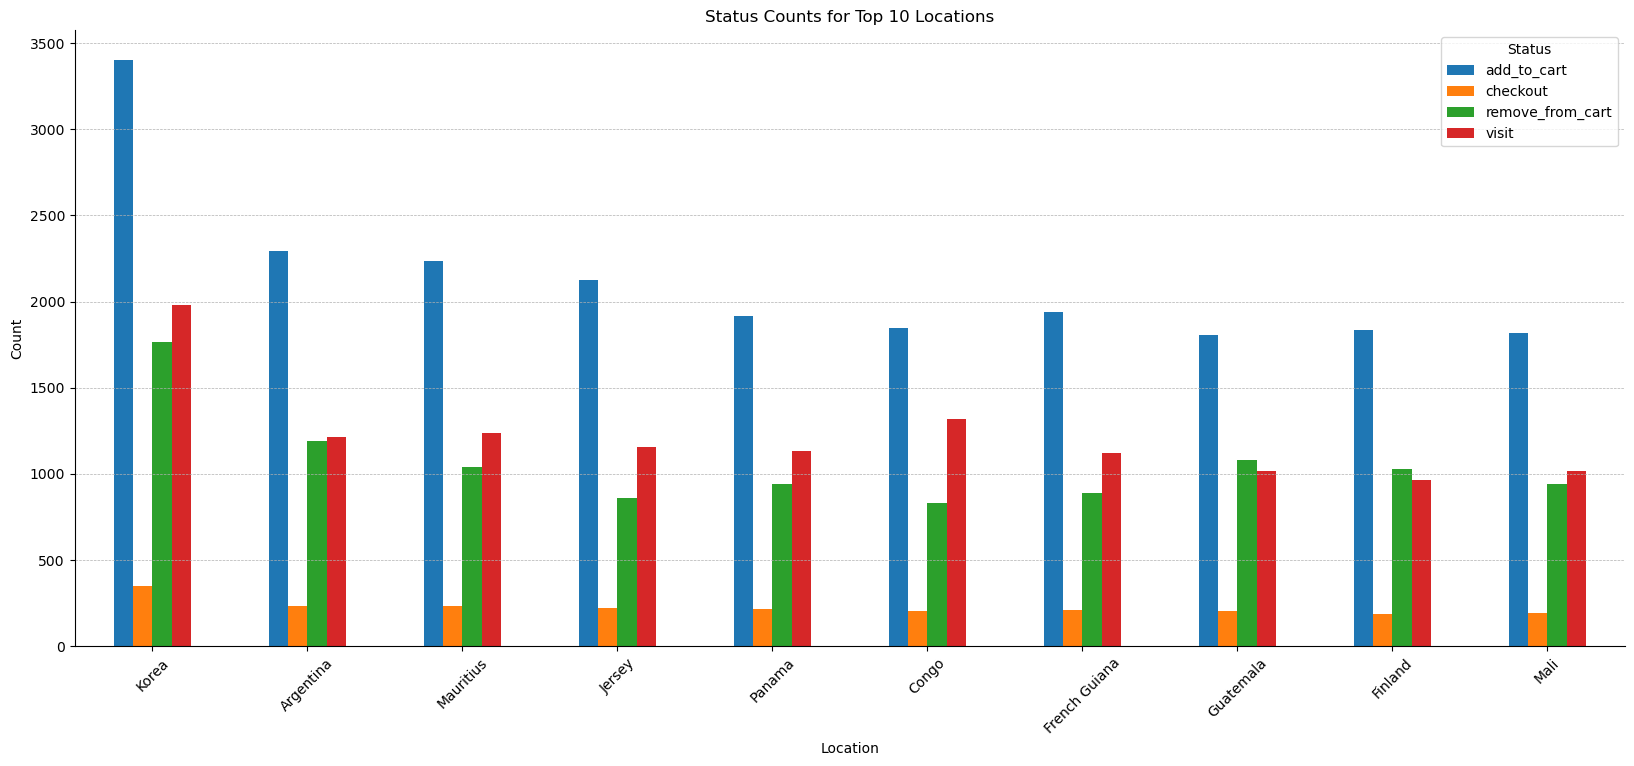

In [66]:
res = new_data.groupby(['country','event_type']).size().unstack()
res_total = res.sum(1).sort_values(ascending=False)
res = res.reindex(res_total.index)


ax = res[:10].plot(kind='bar', stacked=False,figsize=(20,8)) #plot top 10 locations and their status
plt.xlabel('Location')
plt.ylabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.title('Status Counts for Top 10 Locations')
plt.legend(title='Status')
plt.show()

## 

In [67]:
checkouts = new_data[new_data['event_type'] == 'checkout']

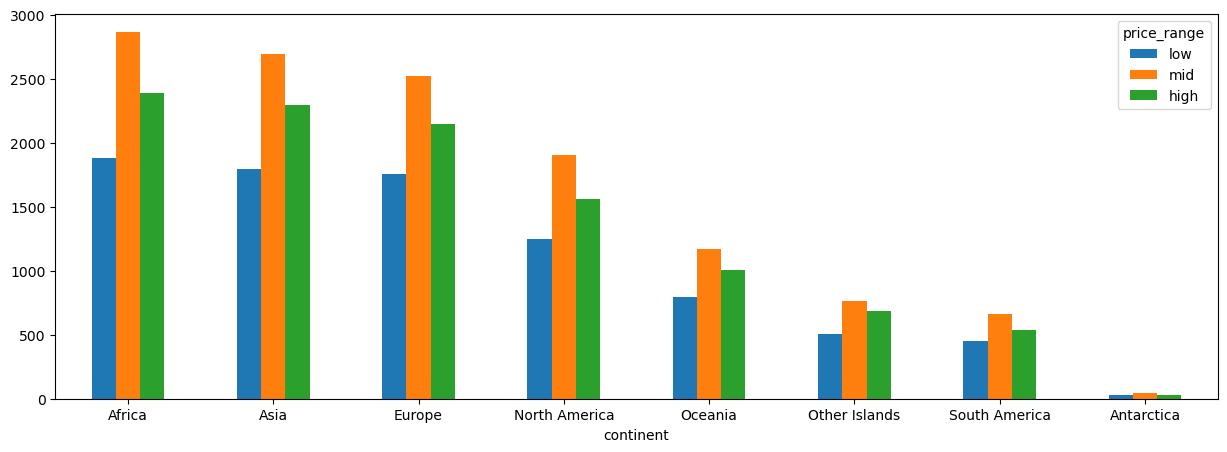

In [68]:
checkouts.groupby(['continent'])['price_range'].value_counts().unstack().sort_values(by=['low','mid','high'], ascending=False).plot(kind='bar', figsize=(15,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)
plt.show()

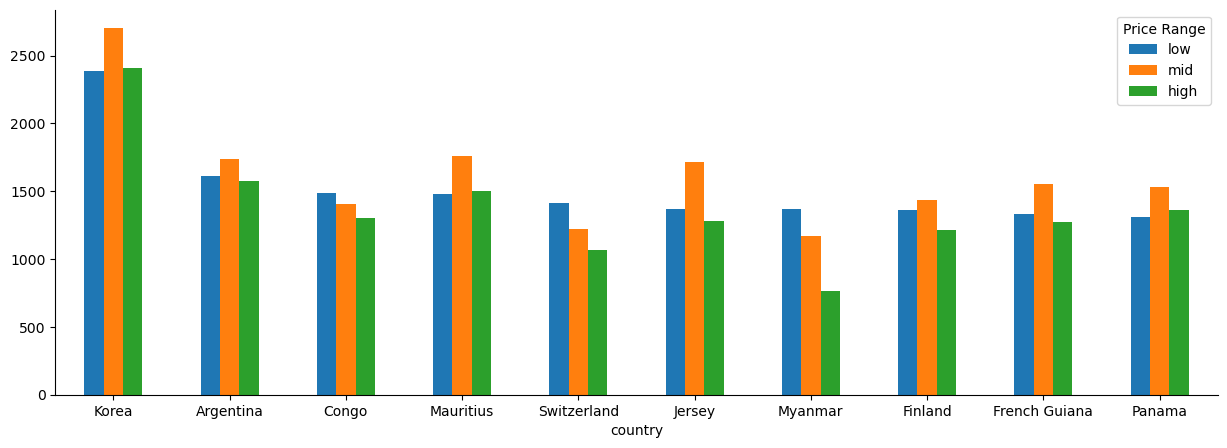

Most Customers buy mid-range Price Products except for some Customers in countries like Switzerland who purchases low-range priced products


This also indicates 

In [69]:
ax = new_data.groupby(['country'])['price_range'].value_counts().unstack().sort_values(by=['low','mid','high'],ascending=[False,False,False])[:10].plot(kind='bar', figsize=(15,5))
plt.xticks(rotation=0)
plt.title('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Price Range')
plt.show()
print('Most Customers buy mid-range Price Products except for some Customers in countries like Switzerland who purchases low-range priced products')
printmd('This also indicates ')

### Overall Purchase Behavior: <a id='3.3'></a>

- Based on the data provided, what insights can you draw about this customer's overall behavior on the website?

- How might these insights inform marketing strategies or personalized recommendations for this customer?


In [70]:
new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')].groupby('country')[['price','quantity']]

#### currency and ease of payment

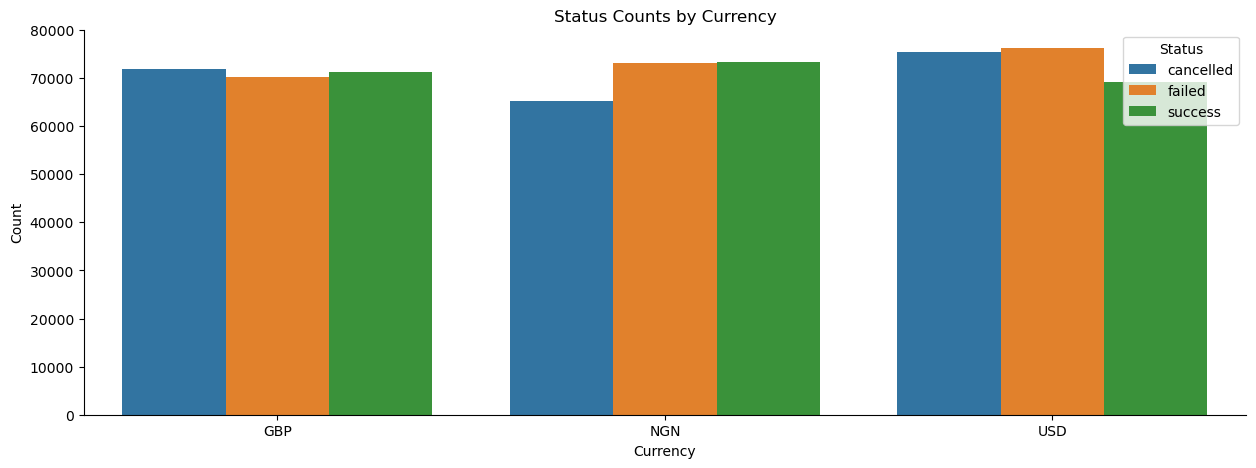

In [71]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=new_data.groupby(['currency', 'status']).size().reset_index(), x='currency', y=0, hue='status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Status Counts by Currency')
plt.legend(title='Status')
plt.show()


Though the difference on some of the currency used in transaction is not quite much for GBP and NGN, NAIRA shows to be the most consistent followed by GBP and USD the last.


Suggestion
    

In [89]:
new_data['device_id'].nunique()

printmd('Of all transaction performed, the total number of devices used on the sites are 10000')

Of all transaction performed, the total number of devices used on the sites are 10000

In [98]:
new_data[new_data['event_type'] == 'remove_from_cart'].groupby(['product_name'])['order_id'].nunique().sort_values()

product_name
Nintendo Switch                1975
Starbucks Coffee Beans         1999
Sony PlayStation 5             2007
Samsung 55-Inch 4K Smart TV    2033
Apple AirPods Pro              2054
Coca-Cola 12-Pack              2061
Apple iPhone 13                2062
Adidas Ultraboost              2065
Microsoft Xbox Series X        2067
Samsung Galaxy S21             2068
Dell XPS 13 Laptop             2073
Nike Air Max 270               2081
Sony WH-1000XM4 Headphones     2086
Canon EOS R5 Camera            2117
Fitbit Charge 4                2122
Name: order_id, dtype: int64

In [99]:
printmd('The most cancelled Product from is **fitbit charge 4**')

The most cancelled Product from is **fitbit charge 4**

In [75]:
new_data.groupby(['event_type','status']).size()

event_type        status   
add_to_cart       cancelled     98800
                  failed       102286
                  success       99990
checkout          cancelled     10420
                  failed        10648
                  success       10673
remove_from_cart  cancelled     49237
                  failed        51396
                  success       48952
visit             cancelled     54141
                  failed        55228
                  success       54114
dtype: int64

In [76]:
event_success = new_data[new_data['status'] == 'success'].groupby(['event_type']).size()
result1 = event_success['checkout']/event_success['add_to_cart']
result1
printmd(f'{round(result*100,2)}% of all products transctions added to the cart were  successfully checked out')

continent
Africa           70200
Asia             64200
Europe           59400
North America    42300
Oceania          30600
Other Islands    16500
South America    15300
Antarctica        1300
Name: order_id, dtype: int64% of all products transctions added to the cart were  successfully checked out

In [100]:
event_success = new_data[new_data['status'] == 'failed'].groupby(['event_type']).size()
result1 = event_success['checkout']/event_success['add_to_cart']
result1
printmd(f'{round(result1*100,2)}% of all products transctions added to the cart were  successfully checked out')

10.41% of all products transctions added to the cart were  successfully checked out

<Figure size 1500x800 with 0 Axes>

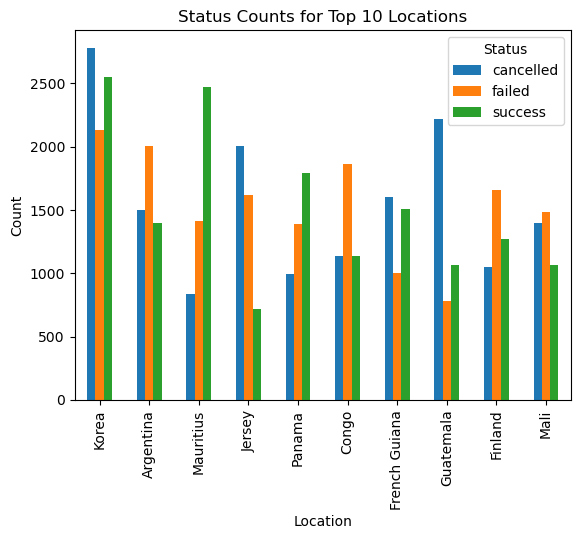

In [101]:
res = new_data.groupby(['country', 'status']).size().unstack()
res_total = res.sum(1).sort_values(ascending=False)
res = res.reindex(res_total.index)

plt.figure(figsize=(15,8))
res[:10].plot(kind='bar', stacked=False) #plot top 10 locations and their status
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Status Counts for Top 10 Locations')
plt.legend(title='Status')
plt.show()


Panama has the most success rate out of all purchases

In [102]:
res = new_data[new_data['event_type'] == 'remove_from_cart']['product_name'].mode()[0]
print('The most remove_from cart item is ' + res)

The most remove_from cart item is Canon EOS R5 Camera


Countries with most visit, goods bought

<Axes: xlabel='country', ylabel='count'>

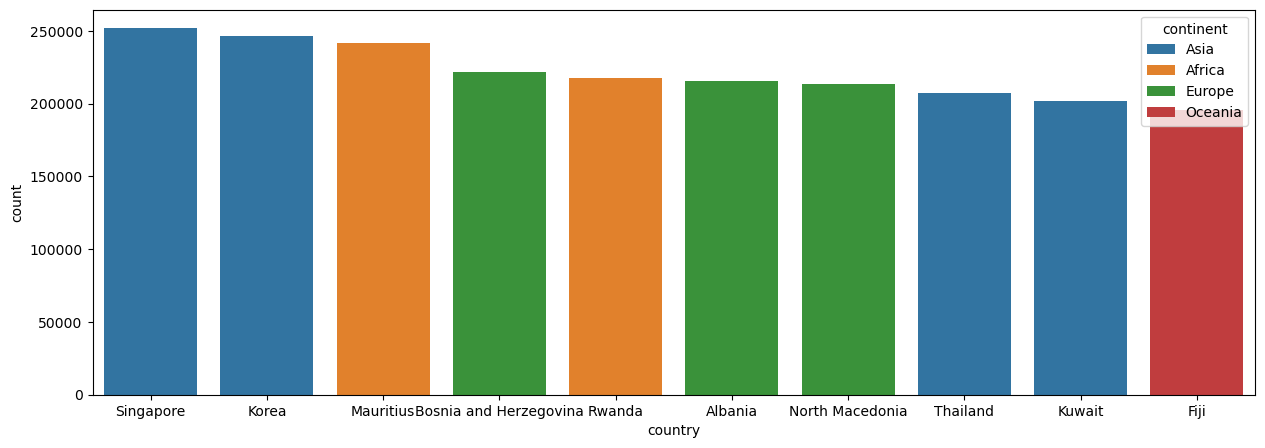

In [103]:
successful_checkout = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')]
successful_checkout['total_price'] = successful_checkout['quantity']*successful_checkout['price']
result = successful_checkout.groupby(['country','continent'])['total_price'].sum().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(15,5))
sns.barplot(result[:10],x='country',y='count',hue='continent')

**Singapore** generates the most purchase price, followed by **Korea, Maritius** for ShopSmart Inc.

,continent,total_price
0,Africa,5083797
1,Asia,4795204
2,Europe,4679579
3,North America,3137313
4,Oceania,2586006
5,Other Islands,1320683
6,South America,1076871
7,Antarctica,51492


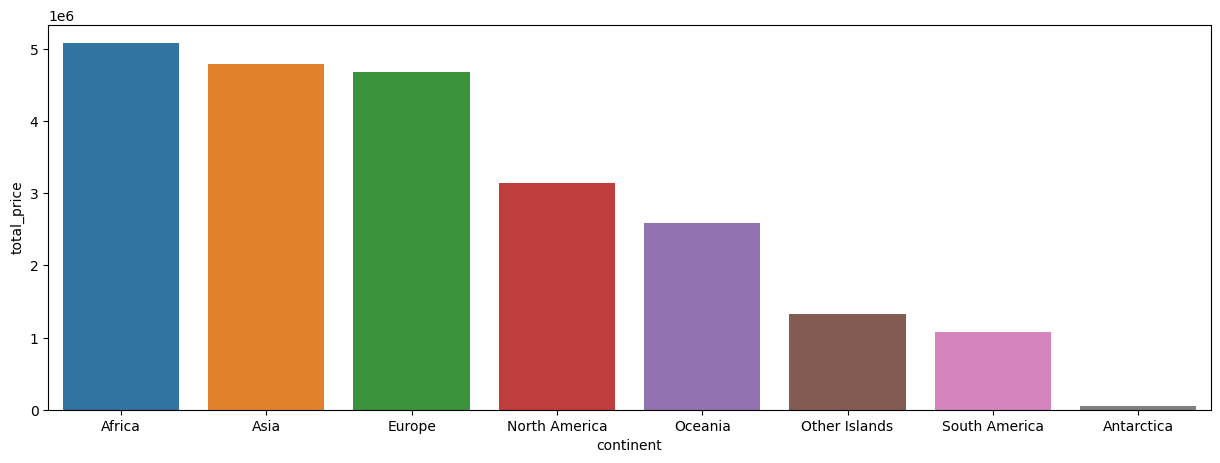

In [104]:
successful_checkout = new_data[(new_data['status'] == 'success') & (new_data['event_type'] == 'checkout')]
successful_checkout['total_price'] = successful_checkout['quantity']*successful_checkout['price']
result = successful_checkout.groupby(['continent'])['total_price'].sum().sort_values(ascending=False).reset_index(name='total_price')
plt.figure(figsize=(15,5))
sns.barplot(result,x='continent',y='total_price',hue='continent')
result

Text(0.5, 1.0, 'Total Order Distribution')

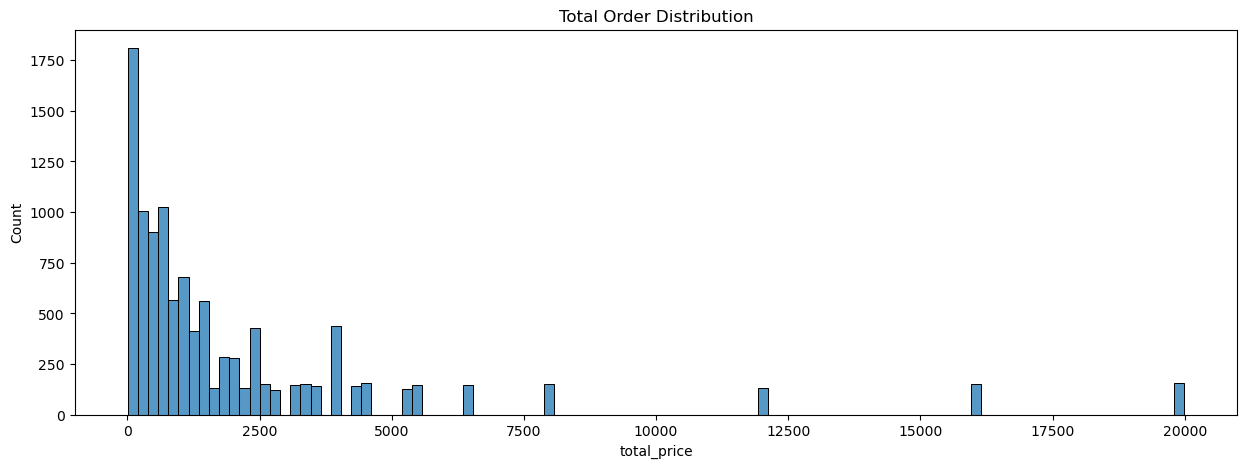

In [105]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data = successful_checkout['total_price'])
ax.set_title('Total Order Distribution')

#### Customers Order

In [1]:
printmd(f'<b>{round((customers_ordered[customers_ordered > 0].count()/customers_ordered.size)*100,2)}%</b> of the customers that visited the website <b>visited</b>, <b>added to cart</b> and <b>checked out</b>')

NameError: name 'printmd' is not defined

In [108]:
# looking at the status of customers that checked out

res = new_data[new_data['order_id'].notna()].groupby('customer_id')['status'].unique().value_counts()

fig = go.Figure(data=go.Pie(labels=res.index, values=res, hole=0.5))


fig.update_layout(title='Customer\'s Transaction Checkout Status Rate')

fig.show()

printmd('Out of <b>9165</b> customers that checked out, customers that <b>cancelled</b> order are <b>33.7%</b>, the percentage of <b>33.6% failed</b> transactions and the percentage of <b>33.6% successful</b> order')


Out of <b>9165</b> customers that checked out, customers that <b>cancelled</b> order are <b>33.7%</b>, the percentage of <b>33.6% failed</b> transactions and the percentage of <b>33.6% successful</b> order